In [1631]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np



In [1632]:
df = pd.read_csv('dataset.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


# Preprocessing the data

In [1633]:
df = df[
    df['Currency'].str.contains(r'UAH|USD', na=False)
]

df['Currency'].unique()


array(['USD\tUnited States dollar', 'UAH\tUkrainian hryvnia'],
      dtype=object)

In [1634]:
df["Developer"] = (df["MainBranch"] == "I am a developer by profession").astype(int)
df["NotDeveloper"] = 1 - df["Developer"]
df.drop("MainBranch", axis=1, inplace=True)
df.head()

,ResponseId,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Developer,NotDeveloper
367,368,65 years or older,"Independent contractor, freelancer, or self-em...",Remote,Apples,Contribute to open-source projects;School or a...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN,0,1
389,390,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,NaN,...,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,1,0
398,399,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5.0,1,0
410,411,45-54 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby;Contribute to open-source projects;Boots...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",On the job training,NaN,NaN,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,1,0
416,417,35-44 years old,"Employed, full-time;Independent contractor, fr...",Remote,Apples,Contribute to open-source projects;Freelance/c...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,20.0,20.0,15.0,0.0,Too long,Neither easy nor difficult,170000.0,8.0,1,0


In [1635]:
def sigma_rule(df, col, threshold = 3):
    mean = df[col].mean()
    sigma = df[col].std()
    print(mean)
    print(sigma)
    print(mean -threshold * sigma)
    print(mean +threshold * sigma)
    outlier_indices = set(
        df.index[(df[col] < mean -threshold * sigma) | (df[col] > mean + threshold * sigma)]
    )
    return outlier_indices
outlier_indeces = sigma_rule(df, "ConvertedCompYearly")
outliers = [df.loc[i, "ConvertedCompYearly"] for i in outlier_indeces]
print(outliers)

low = [i for i in df["ConvertedCompYearly"] if i < 120000]
print(len(low))
df = df.drop(index=outlier_indeces)

128257.35614443797
170489.070924932
-383209.856630358
639724.568919234
[1000000.0, 800000.0, 798000.0, 4936778.0, 2000000.0, 945000.0, 1000000.0, 700000.0, 1500000.0, 1200000.0, 650000.0, 750000.0, 900000.0, 1000000.0, 1000000.0, 800000.0, 700000.0, 720000.0, 750000.0, 1200000.0, 700000.0, 650000.0, 750000.0, 1500000.0, 1000000.0, 850000.0, 800000.0, 1500000.0, 700000.0, 675000.0, 1000000.0, 1200000.0, 650000.0, 810000.0, 740517.0, 950000.0, 750000.0, 9000000.0, 1300000.0, 650000.0, 670000.0, 2000000.0, 750000.0, 1750000.0, 1900000.0, 1332930.0, 750000.0, 750000.0, 750000.0, 1200000.0, 750000.0, 750000.0, 750000.0, 875000.0]
3591


/var/folders/xj/ftm5rcsj041_yx9nxm0wvf5m0000gn/T/ipykernel_8020/3738443300.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


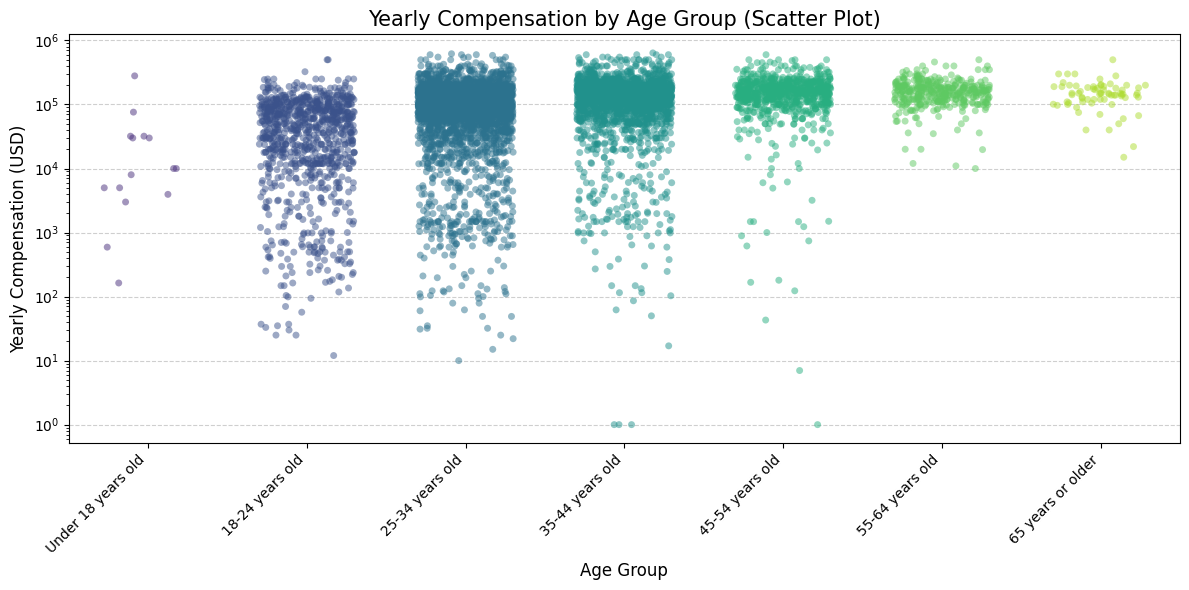

In [1636]:

age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older"
]

# Filter rows with valid age and compensation
df_clean = df.dropna(subset=['ConvertedCompYearly']).copy()

# Ensure age column is categorical and ordered
df_clean['AgeGroup'] = pd.Categorical(
    df_clean['Age'],  # Replace 'Age' with your actual column name
    categories=age_order,
    ordered=True
)


# Create scatter plot with jitter for better visibility
plt.figure(figsize=(12, 6))
sns.stripplot(
    x='AgeGroup',
    y='ConvertedCompYearly',
    data=df_clean,
    order=age_order,
    jitter=0.3,  # Adds horizontal spread to points
    alpha=0.5,
    palette='viridis'
)
plt.title('Yearly Compensation by Age Group (Scatter Plot)', fontsize=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Log scale for better visualization of skewed data
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [1637]:
print(df["Age"].unique())
for i in df["Age"].unique():
    df[i] = (df["Age"] == i).astype(int)
df.drop("Age", axis=1, inplace=True)

['65 years or older' '25-34 years old' '45-54 years old' '35-44 years old'
 '18-24 years old' '55-64 years old' 'Prefer not to say'
 'Under 18 years old']


In [1638]:
# print(df["Employment"].unique())
employment = df["Employment"].unique()
unique_employment = set()
for i in employment:
    for j in i.split(";"):
        unique_employment.add(j)
# print(unique_employment)
def full_time(str):
    if 'Student, full-time' in str.split(";") or 'Employed, full-time' in str.split(";"):
        return 1
    return 0
def part_time(str):
    if 'Student, part-time' in str.split(";") or 'Employed, part-time' in str.split(";"):
        return 1
    return 0
def student(str):
    if 'Student, full-time' in str.split(";") or 'Student, part-time' in str.split(";"):
        return 1
    return 0
def freelancer(str):
    if "Independent contractor, freelancer, or self-employed" in str.split(";"):
        return 1
    return 0
def retired(str):
    if "Retired" in str.split(";"):
        return 1
    return 0
df["Full-time"] = df["Employment"].apply(full_time)
df["Part-time"] = df["Employment"].apply(part_time)
df["Student"] = df["Employment"].apply(student)
df["Freelancer"] = df["Employment"].apply(freelancer)
df["Retired"] = df["Employment"].apply(retired)

df.drop("Employment", axis=1, inplace=True)

In [1639]:
df["In-person"] = df["RemoteWork"].isin(["In-person", "Hybrid (some remote, some in-person)"]).astype(int)
df["Remote"] = df["RemoteWork"].isin(["Remote", "Hybrid (some remote, some in-person)"]).astype(int)

df.drop("RemoteWork", axis=1, inplace=True)

In [1640]:
df["CodingActivities"] = df["CodingActivities"].fillna("")
def hobby(str):
    if 'Hobby' in str.split(";"):
        return 1
    return 0
def freelance(str):
    if not str:
        return 0
    if 'Freelance/contract work' in str.split(";"):
        return 1
    return 0
def open_source(str):
    if not str:
        return 0
    if 'Contribute to open-source projects' in str.split(";"):
        return 1
    return 0
def bootstrapping(str):
    if not str:
        return 0
    if "Bootstrapping a business" in str.split(";"):
        return 1
    return 0
def academic(str):
    if not str:
        return 0
    if "School or academic work" in str.split(";"):
        return 1
    return 0
def pro_development(str):    
    if not str:
        return 0
    if "Professional development or self-paced learning from online courses" in str.split(";"):
        return 1
    return 0
def dont_code(str):    
    if not str:
        return 0
    if "I don’t code outside of work" in str.split(";"):
        return 1
    return 0
# print(df["CodingActivities"])
for i in df["CodingActivities"]:
    if isinstance(i, float):
        print(i)
df["Hobby"] = df["CodingActivities"].apply(hobby)
df["Open source"] = df["CodingActivities"].apply(open_source)
df["Academic"] = df["CodingActivities"].apply(academic)
df.drop("CodingActivities", axis=1, inplace=True)

In [1641]:
for i in df["EdLevel"].unique():
    df[i] = (df["EdLevel"] == i).astype(int)
df.drop("EdLevel", axis=1, inplace=True)

In [ ]:
def fill_in(column):
    df[column] = df[column].fillna("")
    lst = df[column].unique()
    for index, row in df.iterrows():
        value = df.loc[index, column]
        if value not in df.columns:
            df[value] = 0
        df.loc[index, value] = 1
    if "" in df.columns:
        df.drop("", axis=1, inplace=True)
fill_in("DevType")
fill_in("OrgSize")


In [1643]:
# df['OrgSize'].unique()

category_map = {
    'Just me - I am a freelancer, sole proprietor, etc.': 'Small',
    '2 to 9 employees': 'Small',
    '10 to 19 employees': 'Small',
    '20 to 99 employees': 'Small',
    '100 to 499 employees': 'Medium',
    '500 to 999 employees': 'Medium',
    '1,000 to 4,999 employees': 'Large',
    '5,000 to 9,999 employees': 'Large',
    '10,000 or more employees': 'Large',
    'I don’t know': 'Unknown'
}

df['OrgSize'] = df['OrgSize'].map(category_map)

df['Small'] = (df['OrgSize'] == 'Small').astype(int)
df['Medium'] = (df['OrgSize'] == 'Medium').astype(int)
df['Large'] = (df['OrgSize'] == 'Large').astype(int)
df['Unknown'] = (df['OrgSize'] == 'Unknown').astype(int)
cols_to_drop = list(category_map.keys())

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [1644]:
df["Bachelor Degree"]=df["Bachelor’s degree (B.A., B.S., B.Eng., etc.)"]
df['Master Degree']=df["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"]
df['Professional Degree']=df['Professional degree (JD, MD, Ph.D, Ed.D, etc.)']
df['College/university study']=df['Some college/university study without earning a degree']
df.drop('Some college/university study without earning a degree', axis=1)

,ResponseId,Check,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,...,Hardware Engineer,Marketing or sales professional,Small,Medium,Large,Unknown,Bachelor Degree,Master Degree,Professional Degree,College/university study
367,368,Apples,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,API document(s) and/or SDK document(s);User gu...,15,9,Academic researcher,Small,I have some influence,...,0,0,1,0,0,0,0,0,0,1
389,390,Apples,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,NaN,7,7,Student,Small,I have some influence,...,0,0,1,0,0,0,0,0,0,1
398,399,Apples,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,38,30,"Developer, full-stack",Large,I have little or no influence,...,0,0,0,0,1,0,0,0,0,1
410,411,Apples,On the job training,NaN,NaN,39,15,"Developer, full-stack",Small,I have a great deal of influence,...,0,0,1,0,0,0,0,0,1,0
416,417,Apples,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,21,17,"Developer, back-end",Medium,I have some influence,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65261,65262,Apples,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;Coding sessions (live or record...,NaN,4,2,"Developer, full-stack",Small,I have a great deal of influence,...,0,0,1,0,0,0,0,0,0,1
65268,65269,Apples,Books / Physical media;Other online resources ...,Technical documentation;Interactive tutorial;V...,API document(s) and/or SDK document(s);User gu...,9,5,"Developer, full-stack",Large,I have some influence,...,0,0,0,0,1,0,1,0,0,0
65269,65270,Apples,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,28,25,"Senior Executive (C-Suite, VP, etc.)",Medium,I have a great deal of influence,...,0,0,0,1,0,0,0,0,0,1
65270,65271,Apples,Books / Physical media;Colleague;On the job tr...,NaN,NaN,41,25,Research & Development role,Large,I have little or no influence,...,0,0,0,0,1,0,0,1,0,0


/var/folders/xj/ftm5rcsj041_yx9nxm0wvf5m0000gn/T/ipykernel_8020/2349349548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AISearchDevHaveWorkedWith'] = df_filtered['AISearchDevHaveWorkedWith'].str.split(';')


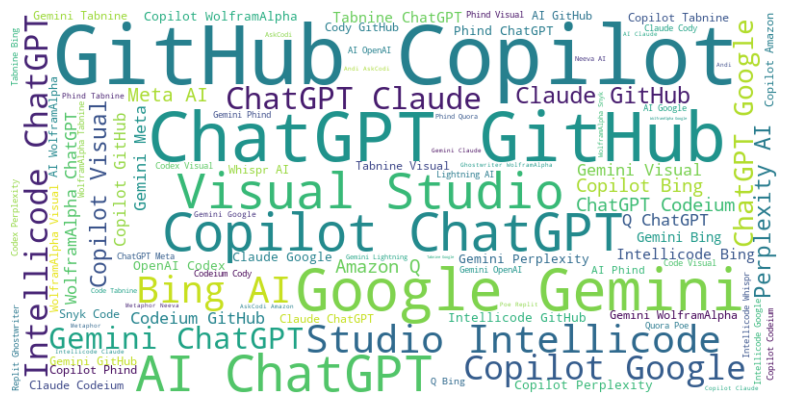

In [1645]:
df_AISearchDevHaveWorkedWith = df[['AISearchDevHaveWorkedWith']]
df_filtered = df_AISearchDevHaveWorkedWith.dropna(subset=['AISearchDevHaveWorkedWith'])

# Split the entries by ';' and expand into separate rows
df_filtered['AISearchDevHaveWorkedWith'] = df_filtered['AISearchDevHaveWorkedWith'].str.split(';')
df_exploded = df_filtered.explode('AISearchDevHaveWorkedWith')


df_exploded.reset_index(drop=True, inplace=True)

tool_counts = df_exploded['AISearchDevHaveWorkedWith'].value_counts()

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all tool names into a single string
text = ' '.join(df_exploded['AISearchDevHaveWorkedWith'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [1646]:
df['AI-powered search (free)'] = df['ProfessionalQuestion'] \
    .str.contains(r'AI-powered search\s*\(free\)', regex=True, na=False) \
    .astype(int)

df['AI-powered search (paid)'] = df['ProfessionalQuestion'] \
    .str.contains(r'AI-powered search\s*\(paid\)', regex=True, na=False) \
    .astype(int)

df.drop('ProfessionalQuestion', axis=1)


,ResponseId,Check,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,...,Small,Medium,Large,Unknown,Bachelor Degree,Master Degree,Professional Degree,College/university study,AI-powered search (free),AI-powered search (paid)
367,368,Apples,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,API document(s) and/or SDK document(s);User gu...,15,9,Academic researcher,Small,I have some influence,...,1,0,0,0,0,0,0,1,0,0
389,390,Apples,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,NaN,7,7,Student,Small,I have some influence,...,1,0,0,0,0,0,0,1,1,0
398,399,Apples,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,38,30,"Developer, full-stack",Large,I have little or no influence,...,0,0,1,0,0,0,0,1,0,0
410,411,Apples,On the job training,NaN,NaN,39,15,"Developer, full-stack",Small,I have a great deal of influence,...,1,0,0,0,0,0,1,0,0,0
416,417,Apples,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,21,17,"Developer, back-end",Medium,I have some influence,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65261,65262,Apples,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;Coding sessions (live or record...,NaN,4,2,"Developer, full-stack",Small,I have a great deal of influence,...,1,0,0,0,0,0,0,1,0,0
65268,65269,Apples,Books / Physical media;Other online resources ...,Technical documentation;Interactive tutorial;V...,API document(s) and/or SDK document(s);User gu...,9,5,"Developer, full-stack",Large,I have some influence,...,0,0,1,0,1,0,0,0,0,0
65269,65270,Apples,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,28,25,"Senior Executive (C-Suite, VP, etc.)",Medium,I have a great deal of influence,...,0,1,0,0,0,0,0,1,0,0
65270,65271,Apples,Books / Physical media;Colleague;On the job tr...,NaN,NaN,41,25,Research & Development role,Large,I have little or no influence,...,0,0,1,0,0,1,0,0,0,0


In [1647]:
df['InUkraine'] = (df['Country'] == 'Ukraine').astype(int)
df = df.drop(columns=['Country'])
print(df[['InUkraine']].value_counts())

InUkraine
0            10219
1             2128
Name: count, dtype: int64


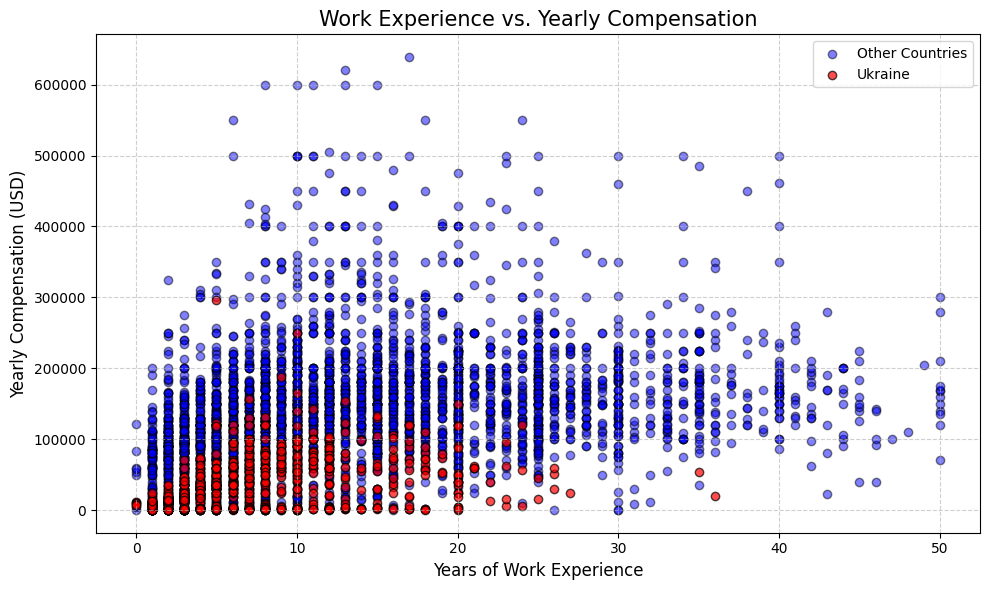

In [1648]:

plt.figure(figsize=(10, 6))

plt.scatter(
    x=df[df['InUkraine'] != 1]['WorkExp'], 
    y=df[df['InUkraine'] != 1]['ConvertedCompYearly'],
    alpha=0.5,
    color='blue',
    edgecolor='black',
    label='Other Countries'
)

plt.scatter(
    x=df[df['InUkraine'] == 1]['WorkExp'], 
    y=df[df['InUkraine'] == 1]['ConvertedCompYearly'],
    alpha=0.7,
    color='red',
    edgecolor='black',
    label='Ukraine'
)

plt.title('Work Experience vs. Yearly Compensation', fontsize=15)
plt.xlabel('Years of Work Experience', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()  # Show the legend
plt.tight_layout()
plt.show()

In [1649]:
df['DevType'].unique()

array(['Academic researcher', 'Student', 'Developer, full-stack',
       'Developer, back-end',
       'Developer, embedded applications or devices',
       'Engineer, site reliability', 'Developer, front-end',
       'Engineering manager', 'Developer, mobile', 'Product manager',
       'Developer, QA or test', '', 'System administrator',
       'Developer, desktop or enterprise applications',
       'Research & Development role', 'Other (please specify):',
       'Security professional',
       'Data scientist or machine learning specialist',
       'Developer Experience', 'Cloud infrastructure engineer',
       'Developer, AI', 'Developer, game or graphics', 'Blockchain',
       'Senior Executive (C-Suite, VP, etc.)', 'Educator',
       'Project manager', 'DevOps specialist', 'Scientist',
       'Data or business analyst', 'Designer', 'Database administrator',
       'Data engineer', 'Developer Advocate', 'Hardware Engineer',
       'Marketing or sales professional'], dtype=object)

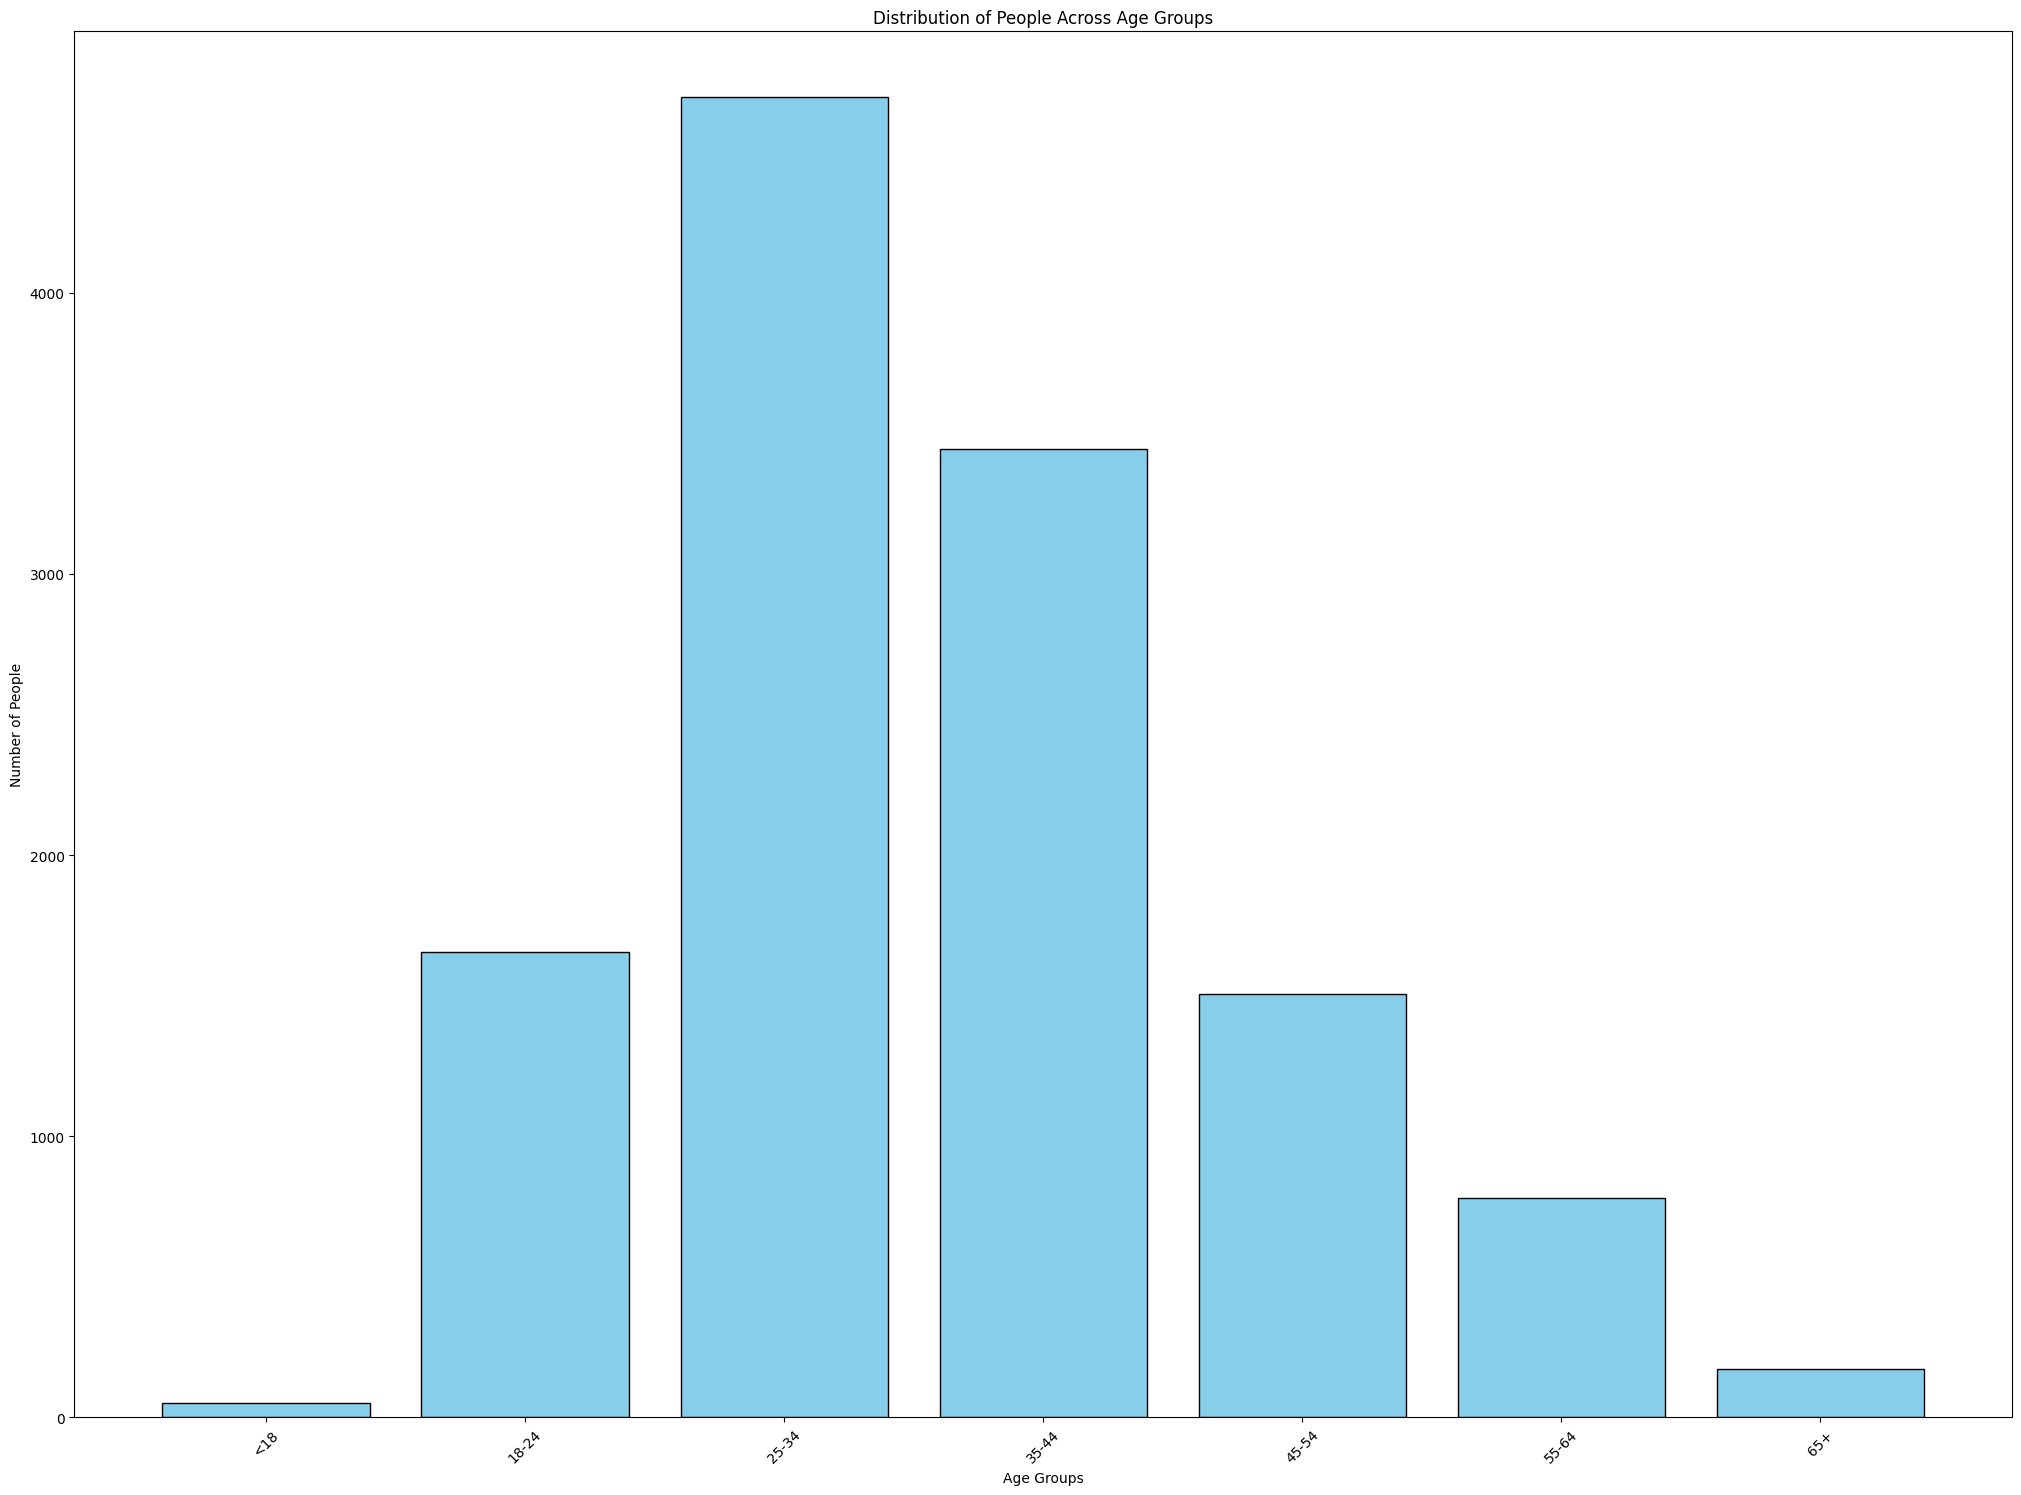

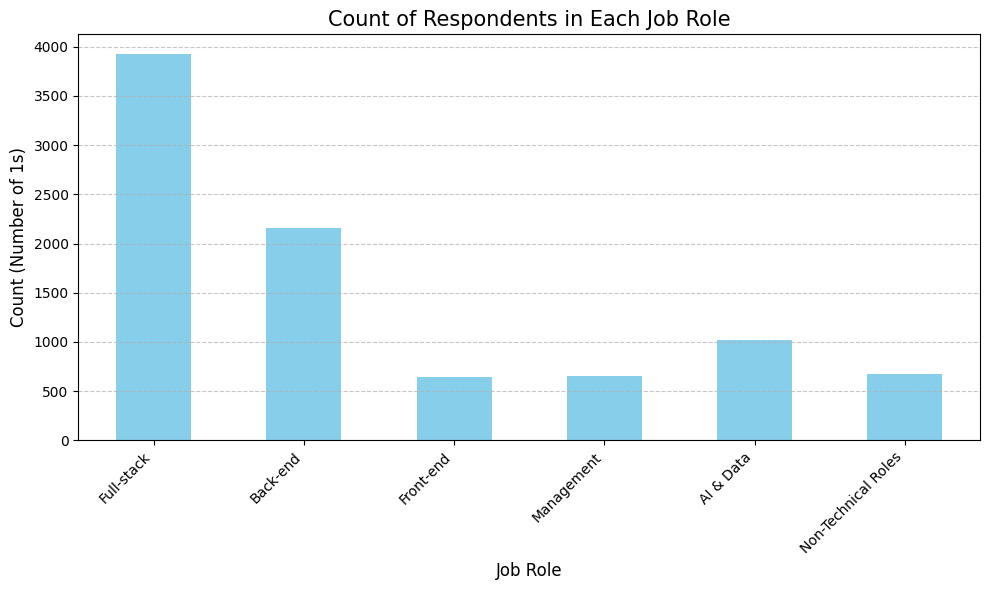

In [1650]:
df65 = df[df["65 years or older"] == 1]
dfunder18 = df[df["Under 18 years old"] == 1]
df18 = df[df["18-24 years old"] == 1]
df25 = df[df["25-34 years old"] == 1]
df35 = df[df["35-44 years old"] == 1]
df45 = df[df["45-54 years old"] == 1]
df55 = df[df["55-64 years old"] == 1]
lengths = [len(dfunder18), len(df18), len(df25), len(df35), len(df45), len(df55), len(df65)]
age_groups = ["<18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
plt.bar(age_groups, lengths, color='skyblue', edgecolor='black')
plt.xlabel("Age Groups")
plt.ylabel("Number of People")
plt.title("Distribution of People Across Age Groups")
plt.xticks(rotation=45)
plt.show()
df = df[df["Under 18 years old"] == 0]
df = df[df["65 years or older"] == 0]
df.drop("Under 18 years old", axis=1)
df.drop("65 years or older", axis=1)

df = df[df["Part-time"] == 0]
df.drop("Part-time", axis=1)

df["Full-stack"] = df["DevType"].isin(["Developer, full-stack"]).astype(int)
df["Back-end"] = df["DevType"].isin(["Developer, back-end"]).astype(int)
df["Front-end"] = df["DevType"].isin(["Developer, front-end"]).astype(int)
# df["Management"] = df["DevType"].isin(["Developer, front-end"]).astype(int)
df["Management"] = df[["Engineering manager", "Product manager", "Project manager", "Senior Executive (C-Suite, VP, etc.)"]].sum(axis=1)
df["AI & Data"] = df[["Data scientist or machine learning specialist", "Developer, AI", "Research & Development role",
        "Scientist", "Data or business analyst", "Data engineer"]].sum(axis=1)
df["Non-Technical Roles"]=df[["Developer Advocate","Marketing or sales professional", "Developer, QA or test","Designer", "Educator", "Marketing or sales professional", "Other (please specify):"]].sum(axis=1)

jobs = ["Full-stack", "Back-end", "Front-end", "Management", "AI & Data" , "Non-Technical Roles"]
lengths = [sum(df[i]) for i in jobs]

jobs = ["Full-stack", "Back-end", "Front-end", 
        "Management", "AI & Data", "Non-Technical Roles"]

job_counts = df[jobs].sum()

plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Respondents in Each Job Role', fontsize=15)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Count (Number of 1s)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [1651]:
print(df['AIComplex'].unique())
binary_map = {
    'Bad at handling complex tasks': 1,
    'Neither good or bad at handling complex tasks': 1,
    'Very well at handling complex tasks': 1,
    'Very poor at handling complex tasks': 0,
    'Good, but not great at handling complex tasks': 0
}

df['AITaskHandling'] = df['AIComplex'].map(binary_map)

mode_value = df['AITaskHandling'].mode()[0]  
df['AITaskHandling'] = df['AITaskHandling'].fillna(mode_value)
df['AITaskHandling'] = df['AITaskHandling'].astype(int)
df['AITaskHandling'].unique()



[nan 'Bad at handling complex tasks'
 'Neither good or bad at handling complex tasks'
 'Very poor at handling complex tasks'
 'Good, but not great at handling complex tasks'
 'Very well at handling complex tasks']


array([1, 0])

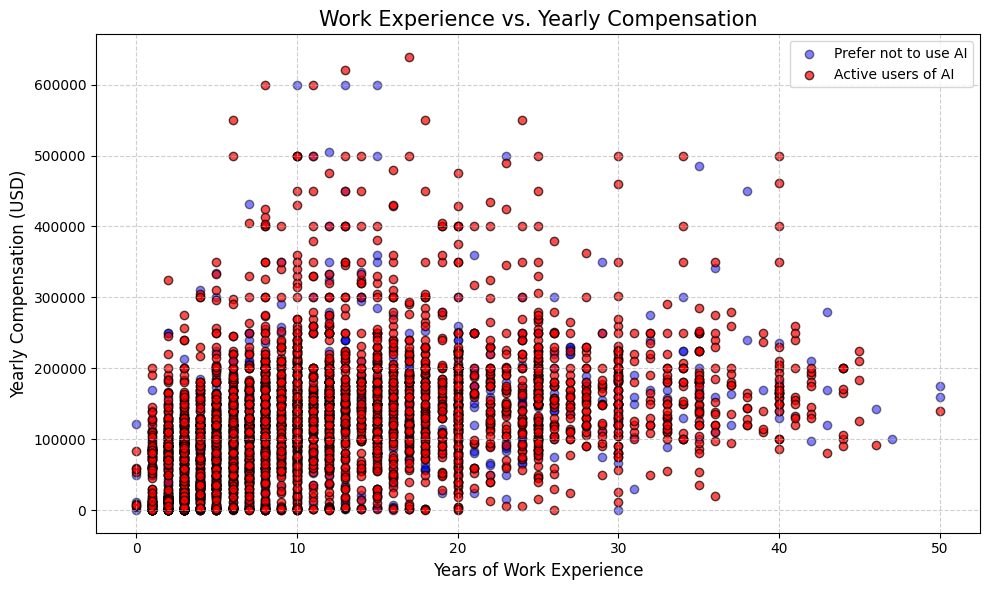

In [1652]:

plt.figure(figsize=(10, 6))

plt.scatter(
    x=df[df['AITaskHandling'] != 1]['WorkExp'], 
    y=df[df['AITaskHandling'] != 1]['ConvertedCompYearly'],
    alpha=0.5,
    color='blue',
    edgecolor='black',
    label='Prefer not to use AI'
)

# Highlight Ukraine points in red
plt.scatter(
    x=df[df['AITaskHandling'] == 1]['WorkExp'], 
    y=df[df['AITaskHandling'] == 1]['ConvertedCompYearly'],
    alpha=0.7,
    color='red',
    edgecolor='black',
    label='Active users of AI'
)

plt.title('Work Experience vs. Yearly Compensation', fontsize=15)
plt.xlabel('Years of Work Experience', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()  # Show the legend
plt.tight_layout()
plt.show()

In [1653]:
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', 0)
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', 51)
df['YearsCodePro'].unique()

array(['30', '15', '17', '4', '11', '23', '18', '10', '3', '40', '26',
       '25', 0, '9', '22', '1', '20', '7', '13', '19', '2', '35', '5',
       '8', '24', '37', '6', '12', '28', '38', '14', '45', '27', '21', 51,
       '34', '29', '16', '32', nan, '31', '39', '43', '42', '33', '36',
       '44', '41', '46', '47', '48'], dtype=object)

In [1654]:
df['AISelect']=df['AISelect'].replace('Yes', 1).replace('No, but I plan to soon', 0).replace("No, and I don't plan to", 0)
df['AISelect'].unique()

array([ 0.,  1., nan])

In [1655]:
df['LearnCode'].unique()
df['Job Training'] = df['LearnCode'].str.contains('On the job training', na=False).astype(int)
df['Online Courses'] = df['LearnCode'].str.contains('Online Courses', na=False).astype(int)
print(df[['LearnCode', 'Job Training', 'Online Courses']].head())

                                             LearnCode  Job Training  \
398  Books / Physical media;Colleague;On the job tr...             1   
410                                On the job training             1   
416  Books / Physical media;Other online resources ...             0   
426  Books / Physical media;Online Courses or Certi...             0   
428  Books / Physical media;On the job training;Oth...             1   

     Online Courses  
398               0  
410               0  
416               1  
426               1  
428               1  


# Modelling

manually dropping the variables 

In [1656]:

table_vars = [
    'ConvertedCompYearly',
    'YearsCodePro',
    'WorkExp',
    'JobSat',
    'Developer',
    # 'Under 18 years old',
    # '25-34 years old',
    '45-54 years old',
    '35-44 years old',
    '55-64 years old',
    'Remote',
    'Academic',
    'Job Training',
    'Online Courses',
    'AI-powered search (free)',
    # 'AI-powered search (paid)',
    'Small',
    'Medium',
    'InUkraine',
    'Bachelor Degree',
    'Master Degree',
    'Professional Degree',
    # 'College/university study',
    'Management',
    # 'AI & Data',
    'Back-end',
    'Front-end'
]
model_df = df[table_vars].copy()
model_df = model_df.dropna()
model_df


,ConvertedCompYearly,YearsCodePro,WorkExp,JobSat,Developer,45-54 years old,35-44 years old,55-64 years old,Remote,Academic,...,AI-powered search (free),Small,Medium,InUkraine,Bachelor Degree,Master Degree,Professional Degree,Management,Back-end,Front-end
398,195000.0,30,30.0,5.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
416,170000.0,17,17.0,8.0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
426,50000.0,4,4.0,8.0,1,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
428,230000.0,11,15.0,8.0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
431,85000.0,23,25.0,8.0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41148,60000.0,15,20.0,10.0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
41149,145000.0,8,8.0,3.0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
41161,50000.0,5,5.0,7.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
41164,94000.0,13,13.0,8.0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [1657]:

model_df = model_df.apply(pd.to_numeric, errors='coerce')

y = model_df['ConvertedCompYearly']
X = model_df
X=X.drop('ConvertedCompYearly', axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.404
Model:                             OLS   Adj. R-squared:                  0.401
Method:                  Least Squares   F-statistic:                     135.6
Date:                 Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                         20:25:26   Log-Likelihood:                -52964.
No. Observations:                 4226   AIC:                         1.060e+05
Df Residuals:                     4204   BIC:                         1.061e+05
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

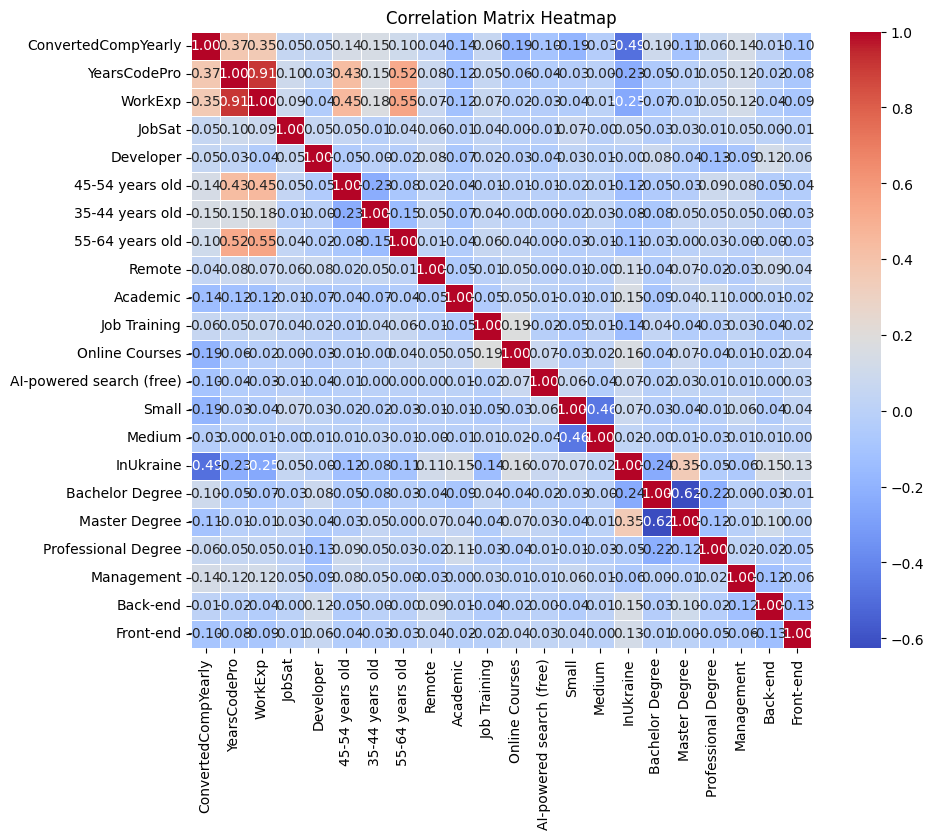

In [1658]:
corr_matrix = model_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [1659]:
model_df = model_df.drop(["WorkExp", "45-54 years old", "35-44 years old", "55-64 years old"], axis=1)
conditions = [
    model_df["Professional Degree"] == 1,
    model_df["Master Degree"] == 1,
    model_df["Bachelor Degree"] == 1
]
choices = [18, 16, 14]

model_df["Years of Education"] = np.select(conditions, choices, default=10)
model_df = model_df.drop(["Bachelor Degree", "Master Degree", "Professional Degree"], axis=1)


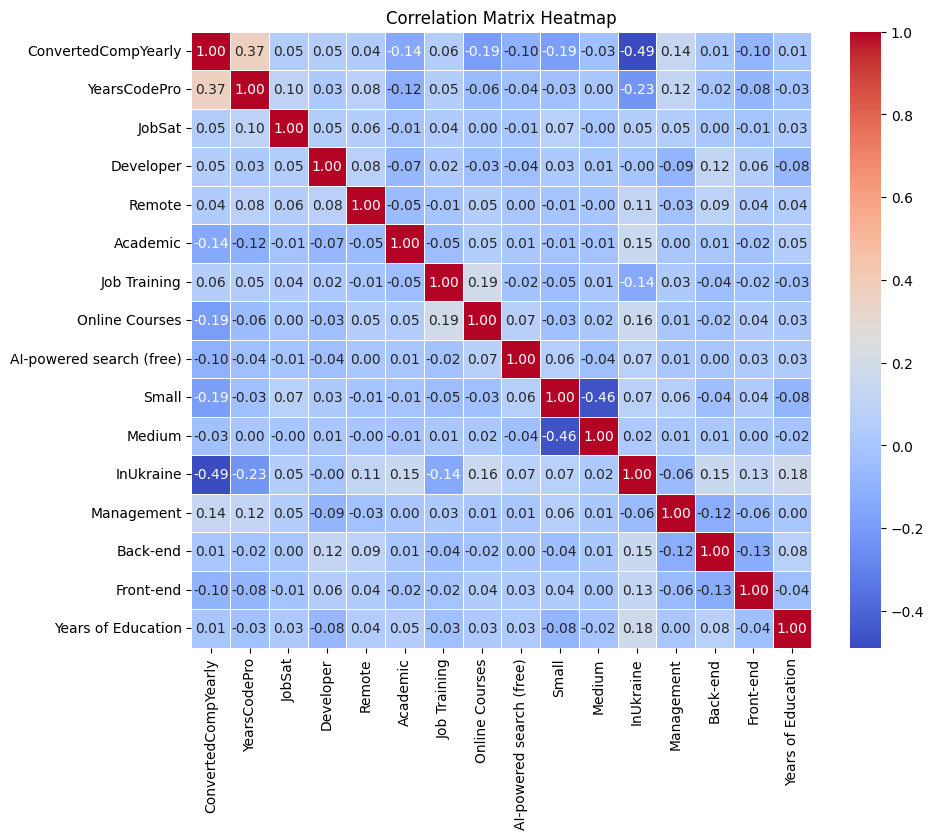

In [1660]:
corr_matrix = model_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [1661]:
model_df = model_df.apply(pd.to_numeric, errors='coerce')

y = model_df['ConvertedCompYearly']
X = model_df
X=X.drop('ConvertedCompYearly', axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.390
Model:                             OLS   Adj. R-squared:                  0.388
Method:                  Least Squares   F-statistic:                     179.7
Date:                 Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                         20:25:27   Log-Likelihood:                -53011.
No. Observations:                 4226   AIC:                         1.061e+05
Df Residuals:                     4210   BIC:                         1.062e+05
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

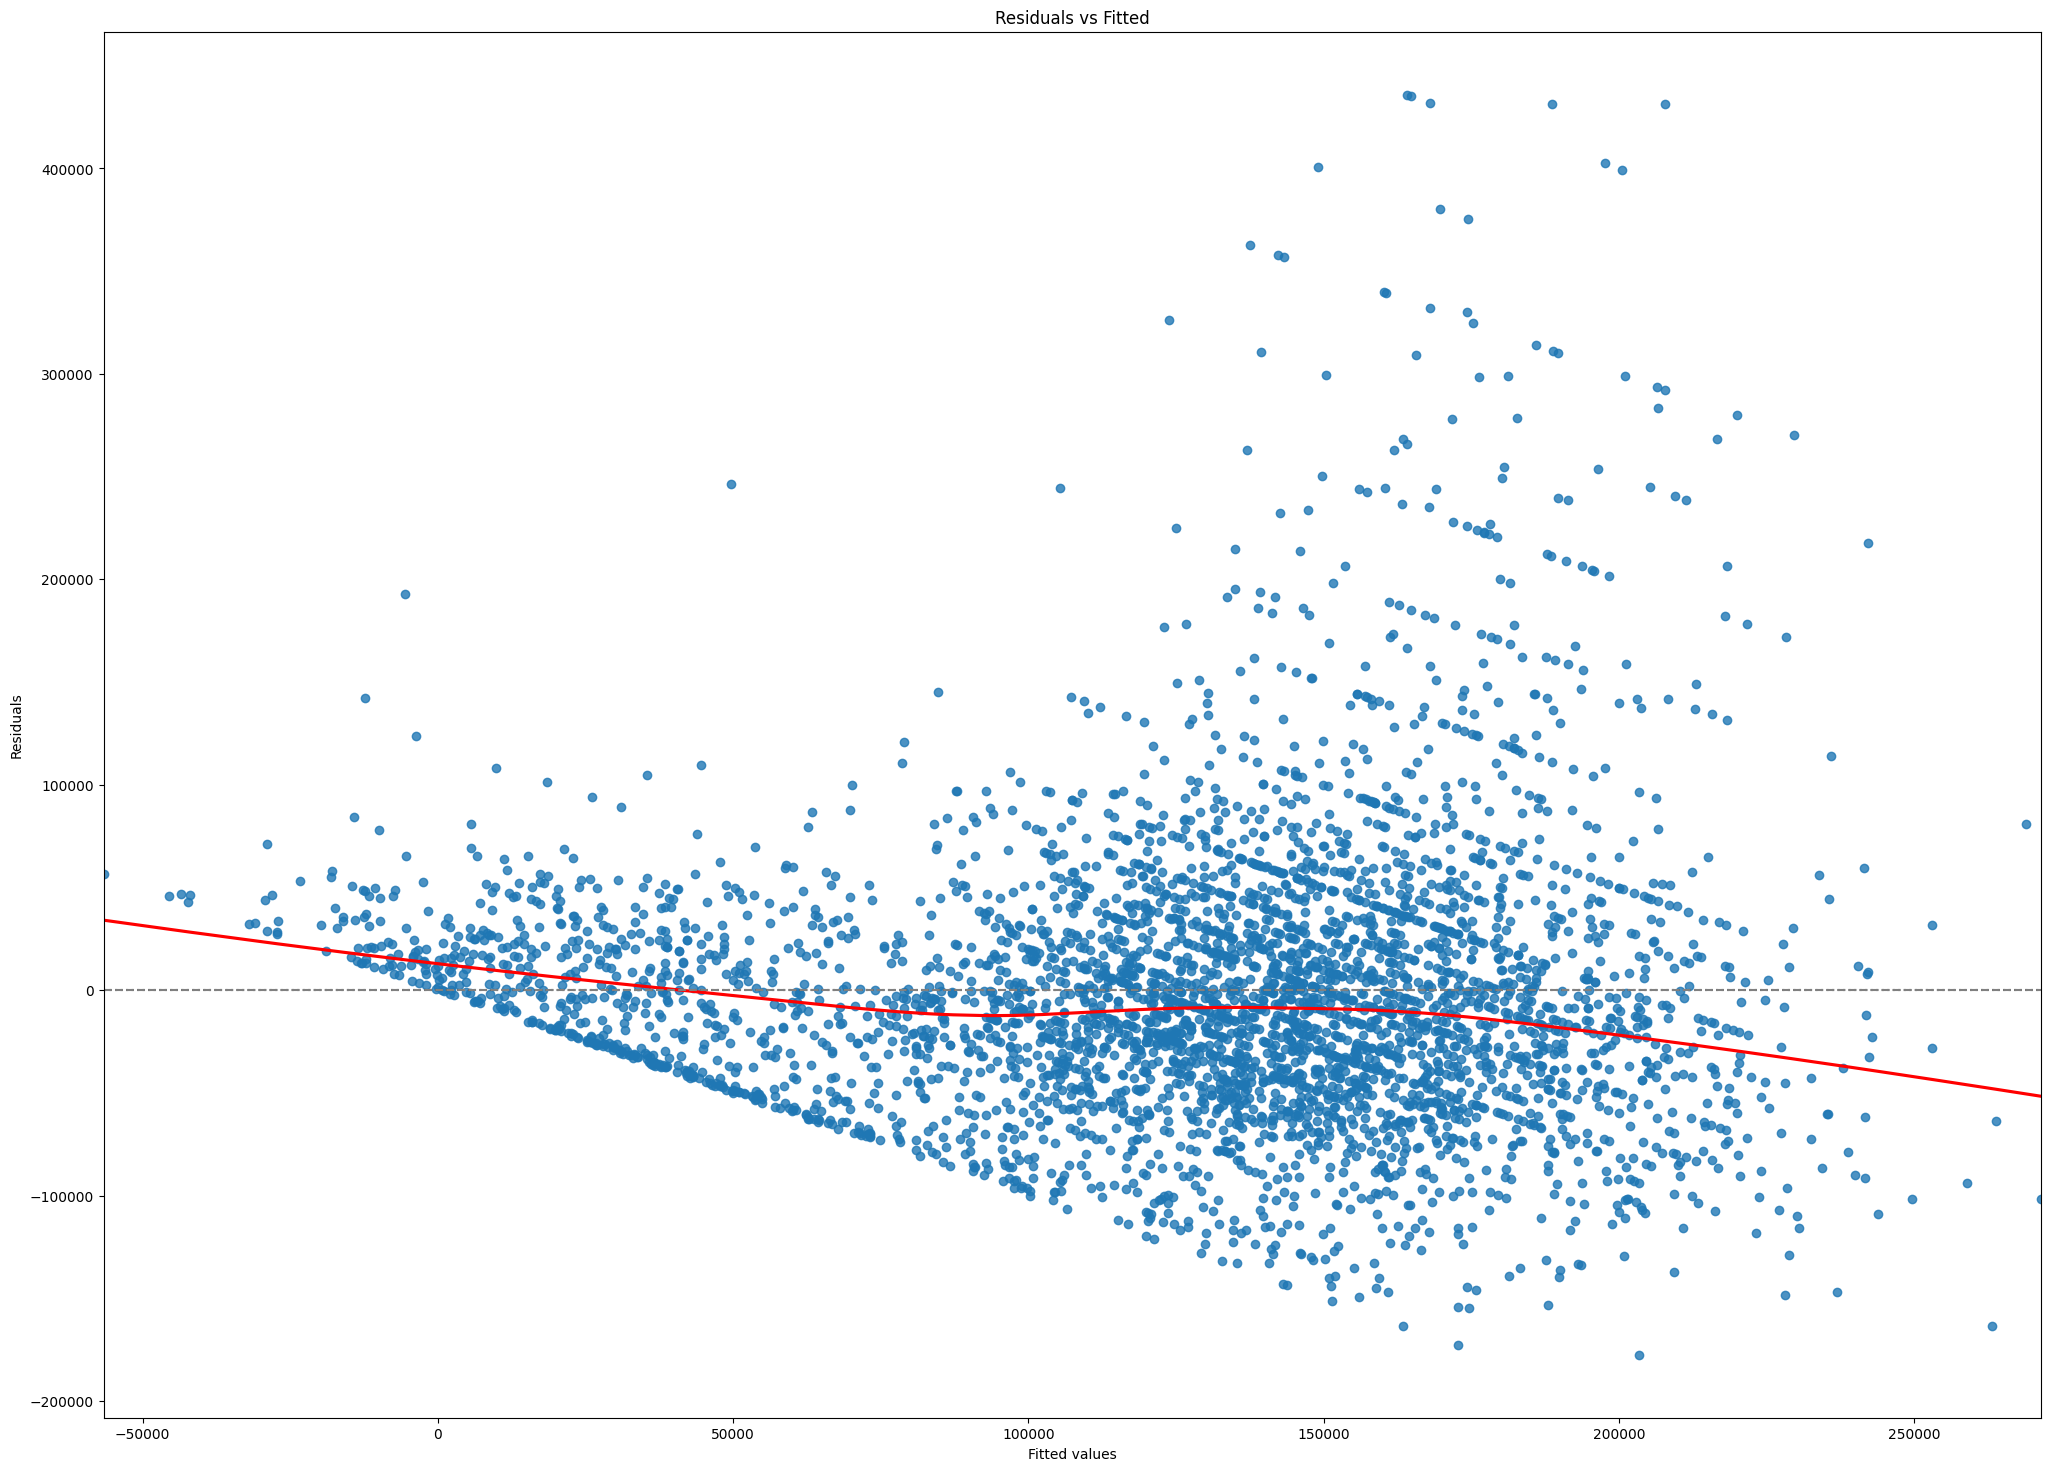

In [1662]:
fitted_vals = model.fittedvalues
residuals = model.resid
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.axhline(0, linestyle='--', color='gray')
plt.show()

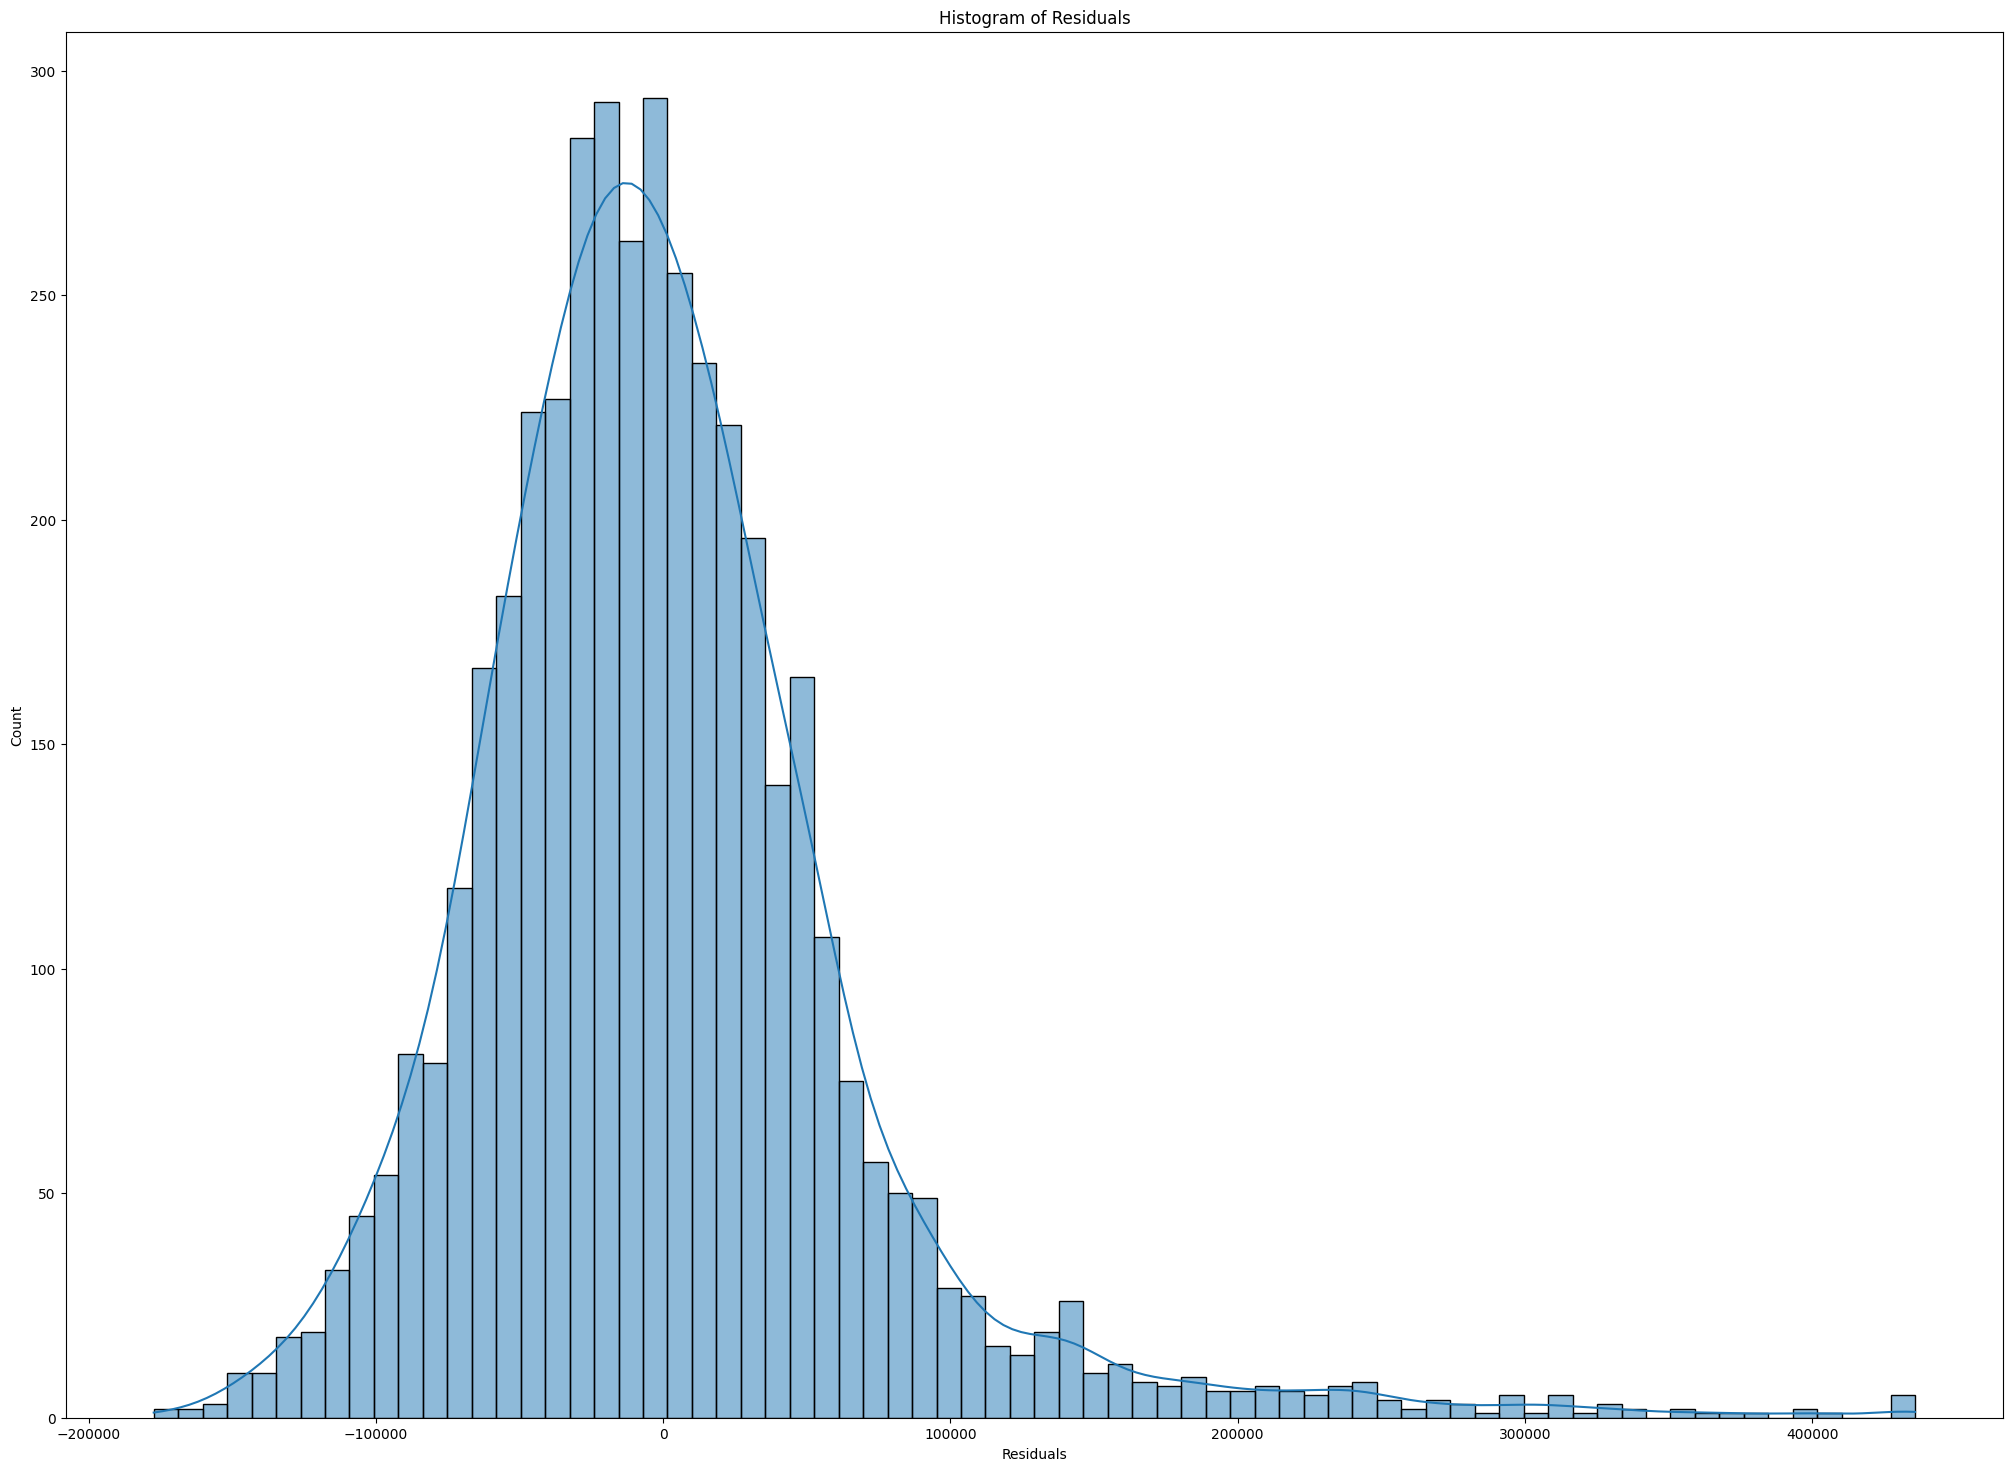

In [1663]:
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()

In [1664]:
from scipy import stats
standardized = (residuals - np.mean(residuals)) / np.std(residuals)


ks_stat, p_value = stats.kstest(standardized, 'norm')

print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

KS Statistic: 0.08630261593057098
P-value: 7.805914704509913e-28


As we can see, all non-binary variables are pretty linear, so the first assumption holds true.

KS Statistic: 0.028743800142855935
P-value: 0.002488655454302902


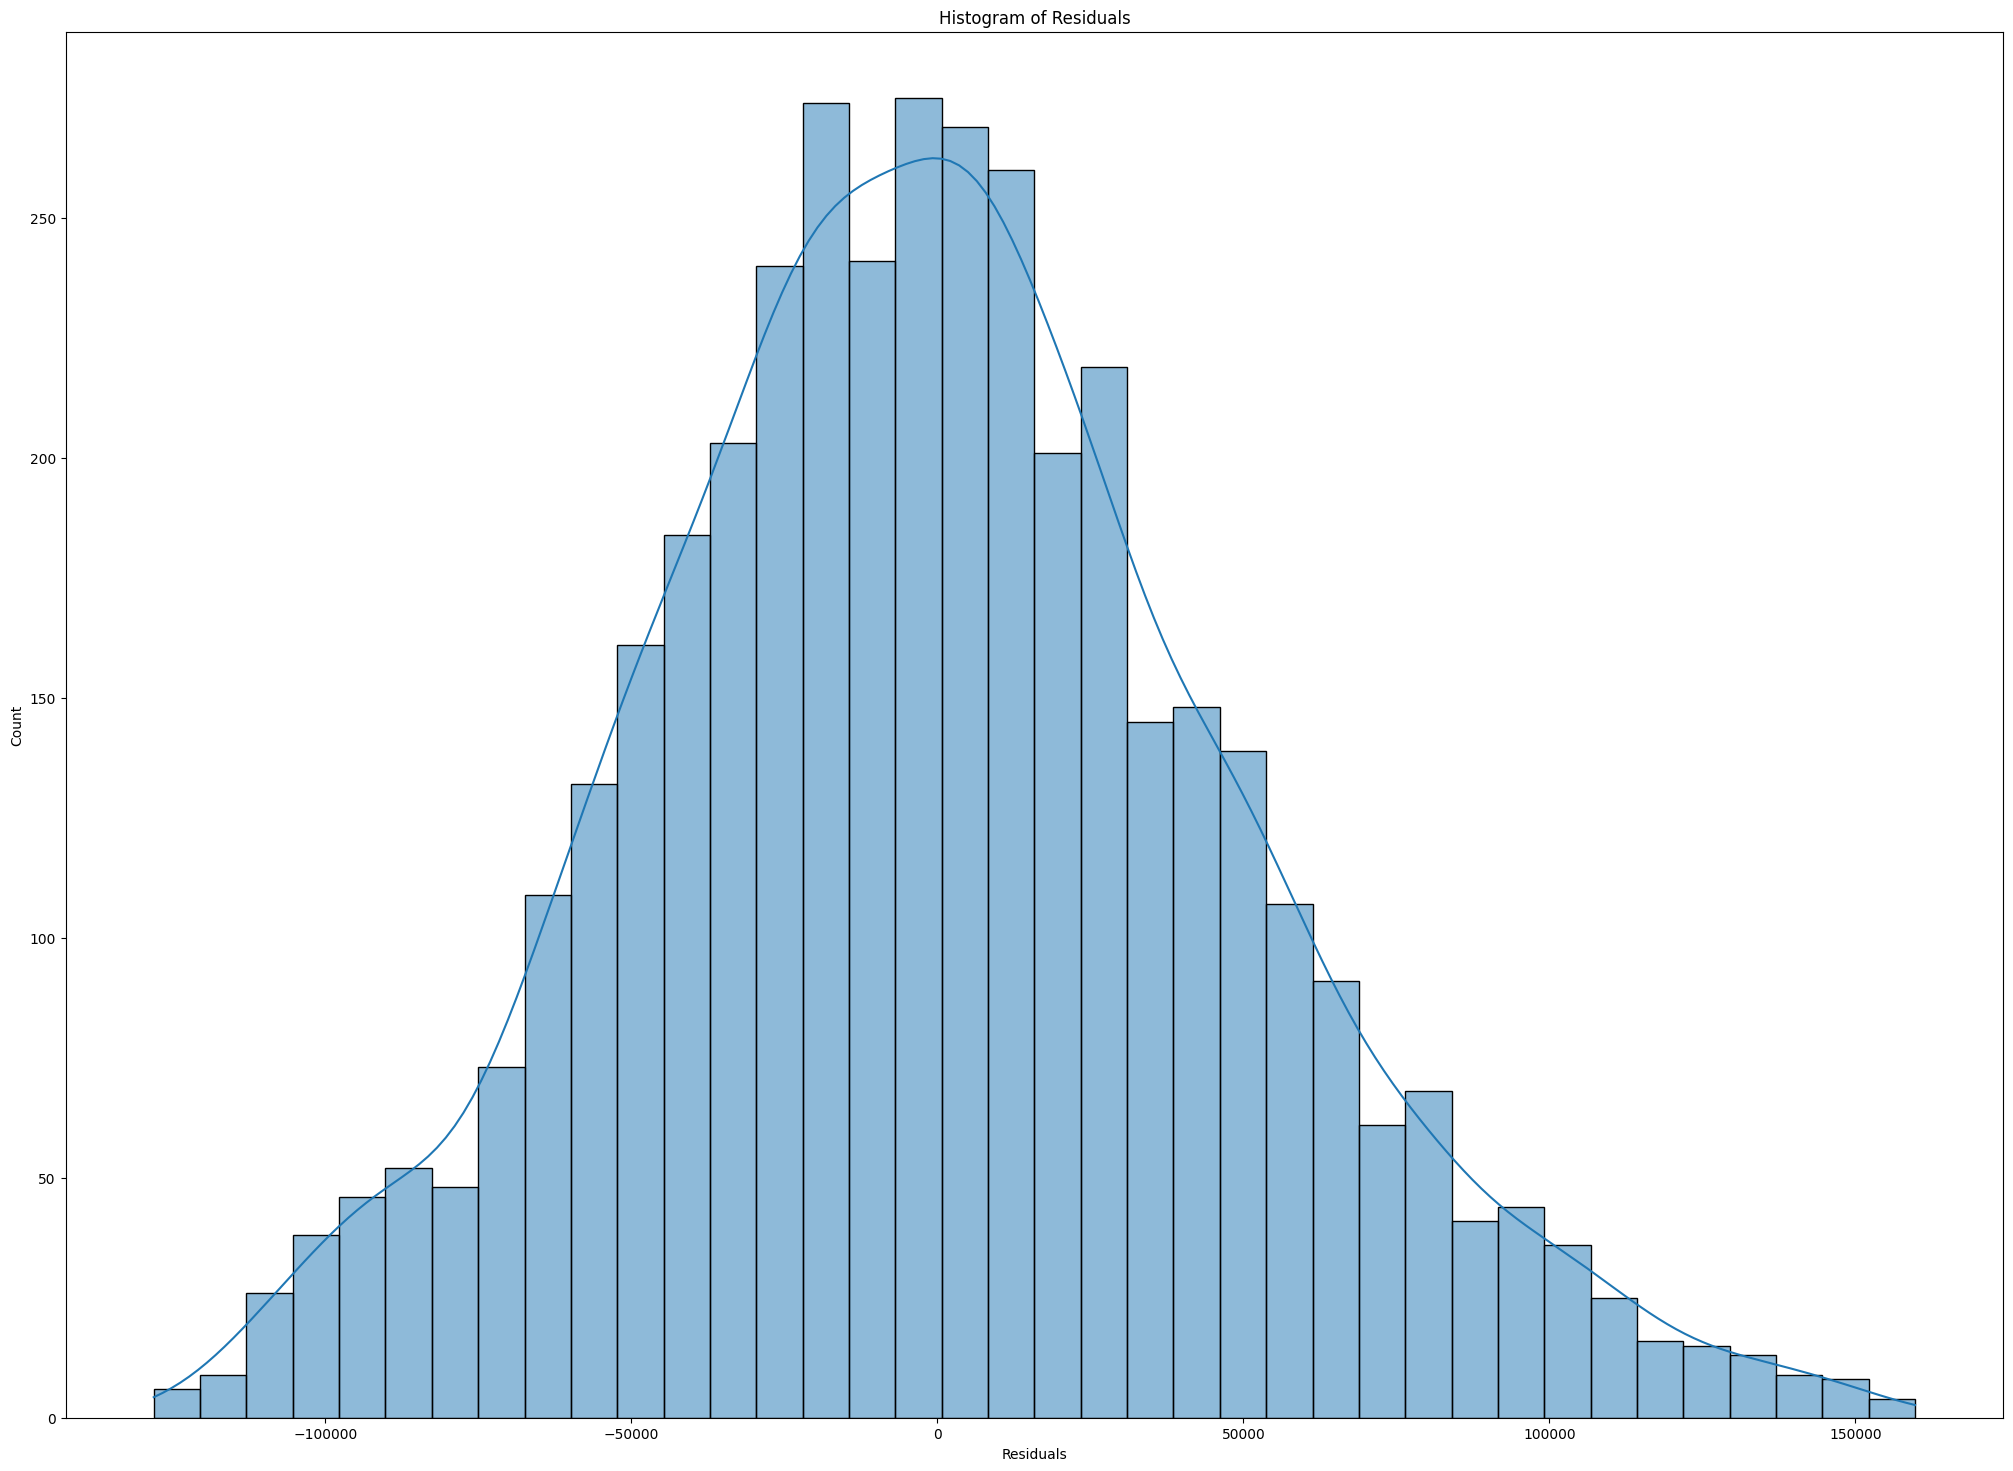

In [1665]:
mask = np.abs(standardized) < 2
X_clean = X[mask]
y_clean = y[mask]
X_clean_const = sm.add_constant(X_clean)
model = sm.OLS(y_clean, X_clean_const).fit()

residuals = model.resid

standardized = (residuals - np.mean(residuals)) / np.std(residuals)


ks_stat, p_value = stats.kstest(standardized, 'norm')

print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()

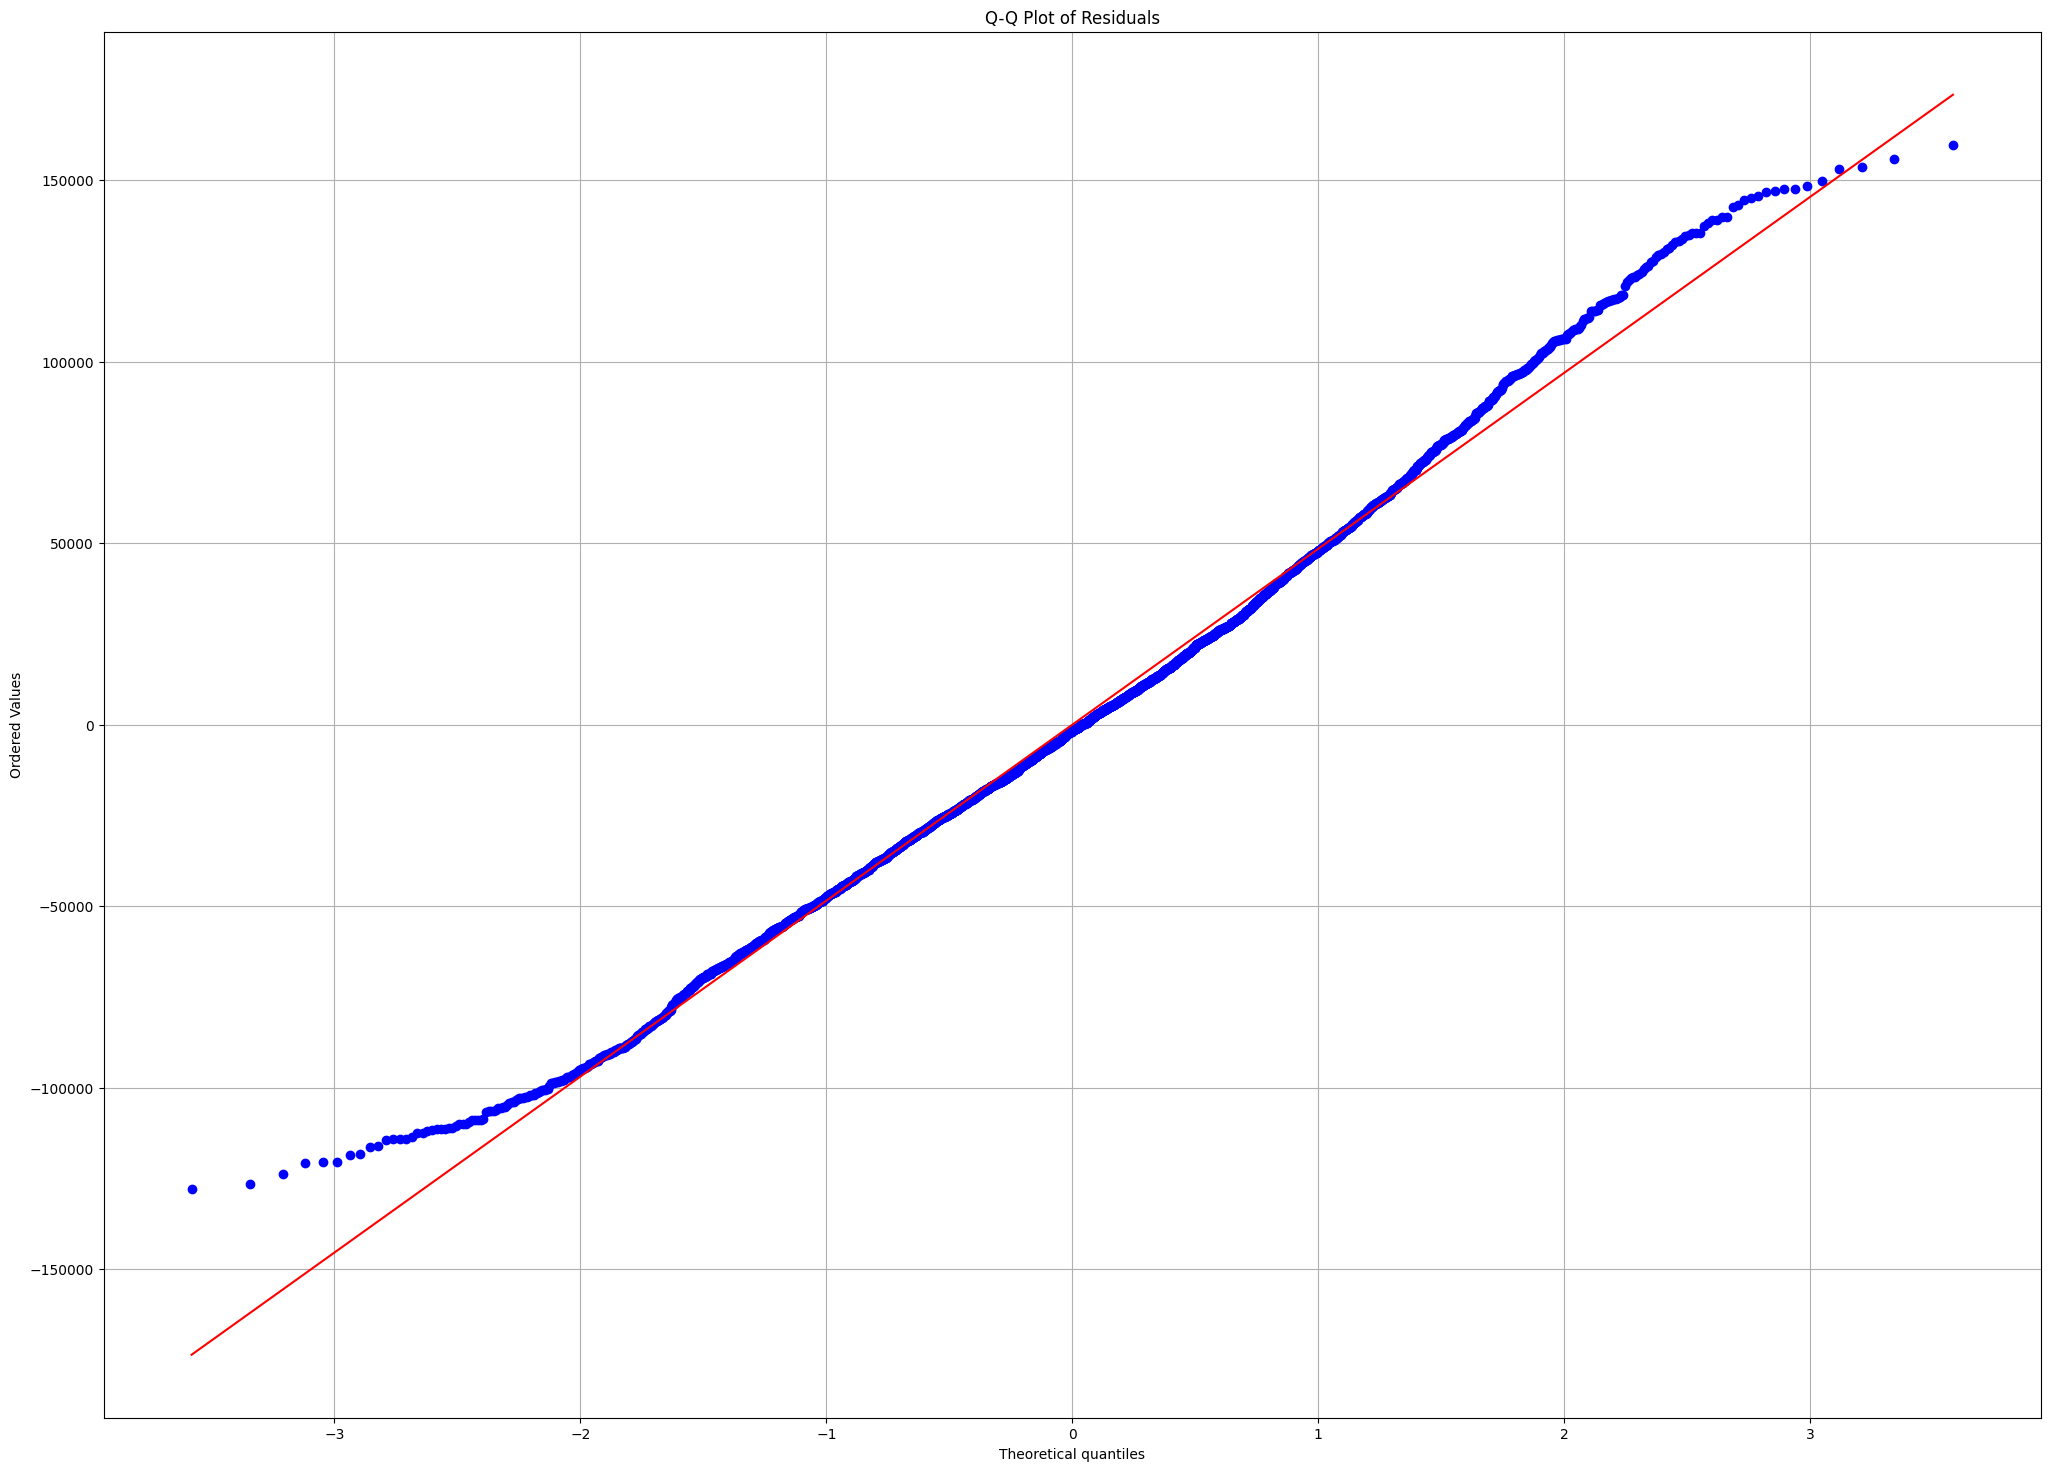

In [1666]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)


plt.show()

In [1667]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 1.9525750204537433


In [1668]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.499
Model:                             OLS   Adj. R-squared:                  0.497
Method:                  Least Squares   F-statistic:                     267.2
Date:                 Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                         20:25:30   Log-Likelihood:                -49279.
No. Observations:                 4036   AIC:                         9.859e+04
Df Residuals:                     4020   BIC:                         9.869e+04
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5.402e+04   7094.110      7.615      0.000    4.01e+04    6.79e+04
YearsCodePro              2220.6894     92.713     23.952      0.000    2038.921    2402.457
JobSat                    1727.3405    365.248      4.729      0.000    1011.252    2443.429
Developer                 1.168e+04   3328.785      3.510      0.000    5158.688    1.82e+04
Remote                    1.931e+04   2532.392      7.627      0.000    1.43e+04    2.43e+04
Academic                 -1.254e+04   2884.552     -4.346      0.000   -1.82e+04   -6881.920
Job Training              2063.1849   1598.669      1.291      0.197   -1071.092    5197.462
Online Courses           -1.612e+04   1596.827    -10.094      0.000   -1.92e+04    -1.3e+04
AI-powered search (free) -1.596e+04   3310.847     -4.821      0.000   -2.25e+04   -9470.233
Small                    -2.534e+04   1866.476    -13.575      0.000    -2.9e+04   -2.17e+04
Medium                   -9691.4658   1921.007     -5.045      0.000   -1.35e+04   -5925.228
InUkraine                -8.759e+04   2228.882    -39.298      0.000    -9.2e+04   -8.32e+04
Management                3.468e+04   3591.742      9.656      0.000    2.76e+04    4.17e+04
Back-end                  8514.5459   1968.007      4.326      0.000    4656.162    1.24e+04
Front-end                -3197.1121   3345.566     -0.956      0.339   -9756.276    3362.052
Years of Education        2304.8045    373.579      6.170      0.000    1572.382    3037.227
==============================================================================
Omnibus:                       44.848   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.065
Skew:                           0.259   Prob(JB):                     9.94e-11
Kurtosis:                       3.081   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

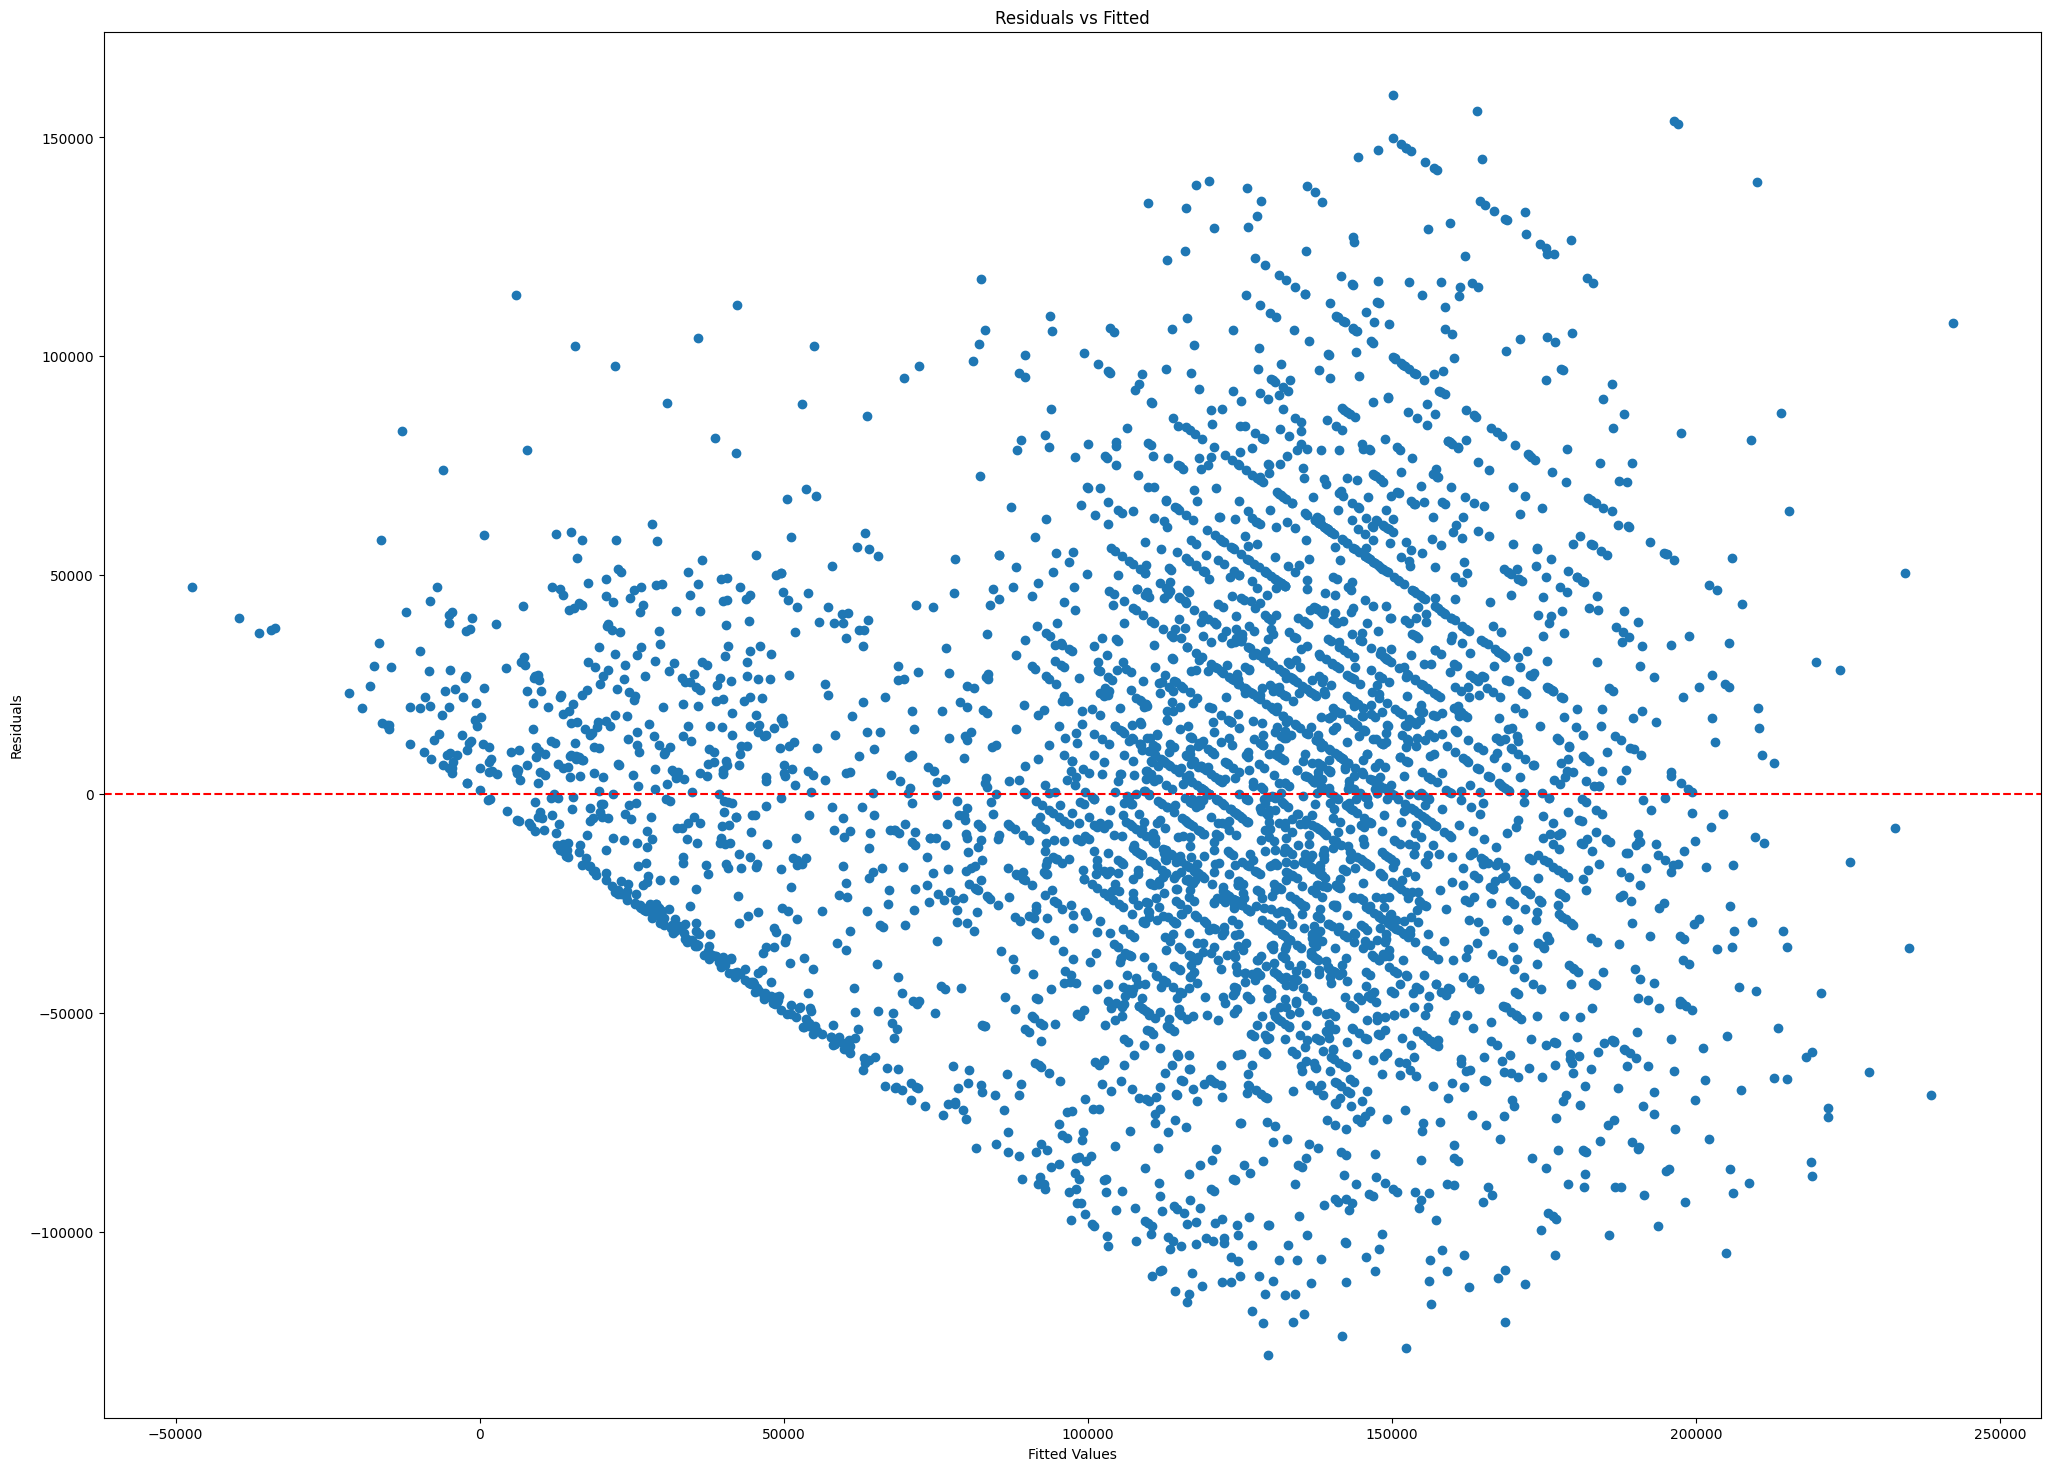

In [1669]:
residuals = model.resid
fitted = model.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

In [1670]:
from statsmodels.stats.diagnostic import het_white
labels = ['LM Statistic', 'LM p-value', 'F-statistic', 'F-test p-value']

white_test = het_white(model.resid, model.model.exog)
dict(zip(labels, white_test))

{'LM Statistic': 353.11161198174494,
 'LM p-value': 4.816449297707804e-25,
 'F-statistic': 3.155143844170496,
 'F-test p-value': 1.2812994059401936e-26}

In [1671]:
model = sm.OLS(y, X).fit(cov_type='HC2')
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.390
Model:                             OLS   Adj. R-squared:                  0.388
Method:                  Least Squares   F-statistic:                     272.3
Date:                 Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                         20:25:30   Log-Likelihood:                -53011.
No. Observations:                 4226   AIC:                         1.061e+05
Df Residuals:                     4210   BIC:                         1.062e+05
Df Model:                           15                                         
Covariance Type:                   HC2                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [1672]:
X = X.drop("Front-end", axis=1)
model = sm.OLS(y, X).fit(cov_type='HC2')
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.390
Model:                             OLS   Adj. R-squared:                  0.388
Method:                  Least Squares   F-statistic:                     291.0
Date:                 Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                         20:25:30   Log-Likelihood:                -53011.
No. Observations:                 4226   AIC:                         1.061e+05
Df Residuals:                     4211   BIC:                         1.061e+05
Df Model:                           14                                         
Covariance Type:                   HC2                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [1673]:
X = X.drop("Job Training", axis=1)
model = sm.OLS(y, X).fit(cov_type='HC2')
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.390
Model:                             OLS   Adj. R-squared:                  0.388
Method:                  Least Squares   F-statistic:                     310.8
Date:                 Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                         20:25:31   Log-Likelihood:                -53011.
No. Observations:                 4226   AIC:                         1.061e+05
Df Residuals:                     4212   BIC:                         1.061e+05
Df Model:                           13                                         
Covariance Type:                   HC2                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

# Logit Model
after manually deleting insignificant variables

In [1674]:
# df['Years of Education'] = model_df['Years of Education']
# table_vars = [
#     'YearsCodePro',
#     'JobSat',
#     'Developer',
#     'Remote',
#     'Academic',
#     'Online Courses',
#     'AI-powered search (paid)',
#     'InUkraine',
#     'Management',
#     'Back-end',
#     'Front-end',
#     'Years of Education'
# ]
# model_df = df[table_vars].copy()
# model_df = model_df.dropna()
model_df = model_df.apply(pd.to_numeric, errors='coerce')


In [1675]:
y = model_df['Remote']
X = model_df
X = X.drop('Remote', axis=1)
X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.313578
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Remote   No. Observations:                 4226
Model:                          Logit   Df Residuals:                     4210
Method:                           MLE   Df Model:                           15
Date:                Mon, 05 May 2025   Pseudo R-squ.:                 0.07663
Time:                        20:25:31   Log-Likelihood:                -1325.2
converged:                       True   LL-Null:                       -1435.2
Covariance Type:            nonrobust   LLR p-value:                 1.814e-38
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3254      0.435     -0.748      0.454      -1.178